In [12]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
from scipy.stats import norm # type: ignore
import altair as alt # type : ignore
from typing import Optional
from functools import reduce
from itertools import chain
Vcat = lambda R,S: R & S
Ocat = lambda C,D: C + D

from models import df


types = set(chain.from_iterable(df[['type1', 'type2']].values)) - {np.nan}

ordering = pd.DataFrame(np.ones((len(types), len(types))), columns=types, index=types)







class PokeDescribe: 
    def __init__(self, datf: pd.DataFrame, color: str): 
        self.TYPE_COLOR_MAPPING = {tp: color for tp in ordering.columns.str.lower()}
        self.HEIGHT = 30
        self.WIDTH = 330
        self.xlim = (0, 180)
        self.stats = ['hp', 'attack', 'defense', 
                      'sp_attack', 'sp_defense', 'speed']
        self.df = datf
        self.x = np.linspace(self.xlim[0], self.xlim[1], 1000)
        self.gaussians = {name: norm(loc=self.df[name].mean(), 
                                     scale=self.df[name].std()) 
                          for name in self.stats}
        self.bells = pd.DataFrame({**{'x': self.x}, 
                                   **{name: self.gaussians[name].pdf(self.x) 
                                      for name in self.stats}})
        self.C = alt.Chart(self.bells, 
                           height=self.HEIGHT, 
                           width=self.WIDTH
                          ).mark_line().encode(
            x=alt.X('x', title=None, axis=alt.Axis(labels=False)))
        self.charts = {name: self.C.encode(y=alt.Y(name, title=name)) for name in self.stats}
        self.BellCurves = reduce(Vcat, [self.charts[name] for name in self.stats])

class PokeDescribeNAME(PokeDescribe): 
    def __init__(self, datf: pd.DataFrame, Name: str, color: str): 
        super().__init__(datf, color)
        self.PSI = 50
        self.pokename = Name
        self.typ = self.df[self.df.name==self.pokename].type1.values[0]
        self.typ_color = self.TYPE_COLOR_MAPPING[self.typ]
        self.y_max = 1.3 * max([max(ls) for ls in [self.gaussians[st].pdf(self.x) for st in self.stats]])
        self.y = pd.DataFrame({'y': np.linspace(0, self.y_max, self.PSI)})
        self.D = alt.Chart(self.y).mark_line(color=self.typ_color).encode(y=alt.Y('y', title=''))
        self.means = {st: self.df[self.df.name==self.pokename][st].mean() for st in self.stats}
        self.Dcharts = {st: self.D.encode(x=alt.value(self.means[st]))
                        for st in self.stats}
        self.SHOW = reduce(Vcat, [self.charts[st] + self.Dcharts[st] 
                                  for st in self.stats]
                          ).configure_text(color='blue', angle=90)


In [22]:
abra = PokeDescribeNAME(df, Name="Abra", color='purple')

blastoise = PokeDescribeNAME(df, Name="Blastoise", color='blue')

raichu = PokeDescribeNAME(df, Name="Raichu", color='yellow')

zigzagoon = PokeDescribeNAME(df, Name="Zigzagoon", color='brown')

mewtwo = PokeDescribeNAME(df, Name="Mewtwo", color='purple')

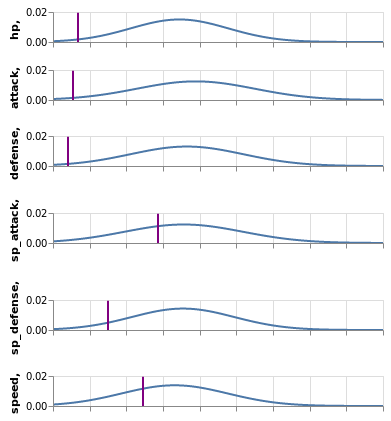

In [16]:
abra.SHOW

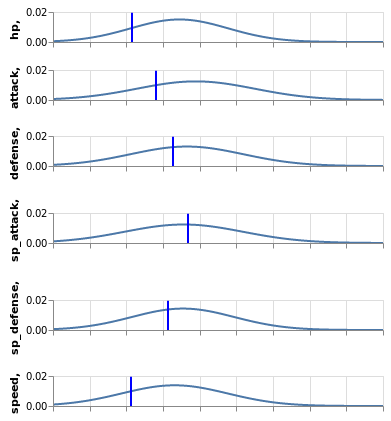

In [17]:
blastoise.SHOW

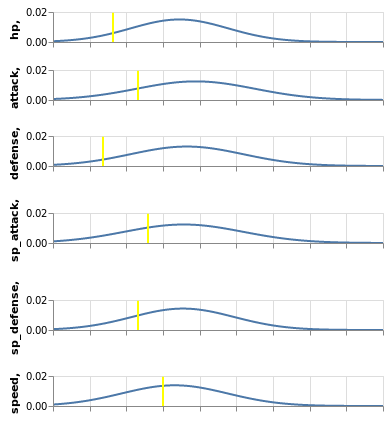

In [23]:
raichu.SHOW

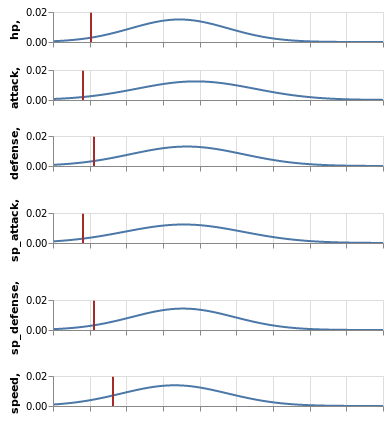

In [18]:
zigzagoon.SHOW

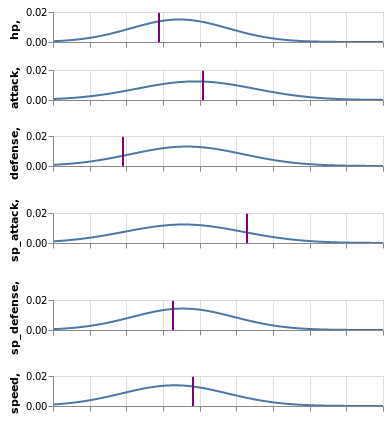

In [21]:
mewtwo.SHOW